In [1]:
import json
import numpy as np
  
# read json data file
f=open('taxi_requests.json')
data = json.load(f)
f.close()

login_times=data['request_time']

# uncomment next line to see how the data looks like
# display(login_times) 
# display(data)

In [18]:
# convert time string to timestamps
from datetime import datetime, timezone,timedelta
import pytz

local_tz = pytz.timezone('Asia/Tehran')
# timestamps=[datetime.strptime(login_times[i], '%Y-%m-%d %H:%M:%S').timestamp() for i in range(len(login_times))]
# timestamps
timestamps=[(datetime.strptime(login_times[i], '%Y-%m-%d %H:%M:%S').replace(tzinfo=timezone.utc).astimezone(local_tz)+timedelta(hours=-3.5)).timestamp() for i in range(len(login_times))]
# print(timestamps)

# Written questions

Please search online and read the documentation for strptime() and timestamp() and write down short answers to the following questions:

A- What does the previous cell do? it uses strptime to get timestamps

B- What does the concept of "timestamp" mean? What are its type and unit?

C- Is the variable "timestamps" a list or a numpy array?

D- Which day of week (Sunday, Monday, ...) is 1970-01-01?

E- Which function can convert a timestamp back to datetime?


# Project questions

Explore data, write code, and search online to answer the following questions about the data:

1- How many days are there in the data?

2- Which date was the busiest date (the day with the most requests)? Which date was the second busiest date?

3- Which hour was the busiest hour (the hour with the most requests)?

4- Are there any two requests that happened at the same time?

5- What is the longest gap between two consequent requests?

6- Overall, does the volume of requests increase or decrease over time?

7- Bonus: For each day calculate the average request time for all requests between 6:00 AM and 9:00 AM

8- Bonus: Which day of week is the busiest?

9- Bonus: Calculate the average number of requests for each of the 7*24 hours of the week.

10- Bonus: Which dates other than the standard weekend days were holidays?

# answers


In [15]:
# the first question:
import numpy as np
day_number_list=np.array(timestamps).astype(int)//(24*60*60)
days, day_event_counts = np.unique(day_number_list, return_counts=True)
days_in_data=len(days)
print('number of days in data:',days_in_data)

number of days in data: 103


In [19]:
# the second question:
day_number_list=np.array(timestamps).astype(int)//(24*60*60)

days, day_event_counts = np.unique(day_number_list, return_counts=True) 

day_with_maximum_event_index=np.argmax(day_event_counts) 
day_with_second_max_event_index=np.argpartition(day_event_counts.flatten(), -2)[-2]

print("the busiest day is day number ",days[day_with_maximum_event_index])
print("the second busiest day is day number",days[day_with_second_max_event_index])

the busiest day is day number  92
the second busiest day is day number 72


In [20]:
# third question
second_in_day_list=(np.array(timestamps).astype(int)%(24*60*60))
hour_number_list=np.array(second_in_day_list).astype(int)//(60*60)

hours, hour_event_counts = np.unique(hour_number_list, return_counts=True)

hour_with_maximum_event_index=np.argmax(hour_event_counts) 
print("the busiest hour is  ",hours[hour_with_maximum_event_index])

the busiest hour is   19


In [22]:
# 4th question
def uni(records_array):
    # np_unique test
    records_array=np.array(records_array).astype(int)

    vals, count = np.unique(records_array, return_counts=True)
    same_timestamp_dict=dict()
    for i in range(len(count)):
        if count[i]>1:
            same_timestamp_dict[vals[i]]=count[i]
    return same_timestamp_dict

print(len(uni(timestamps).keys()))

868


In [25]:
#5th question
diff=np.ediff1d(np.array(timestamps))
print(np.amax(np.abs(diff)))

5999.0


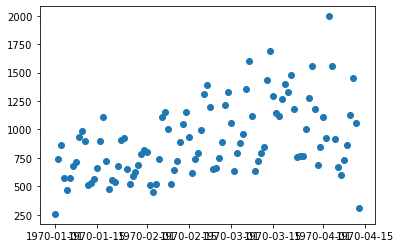

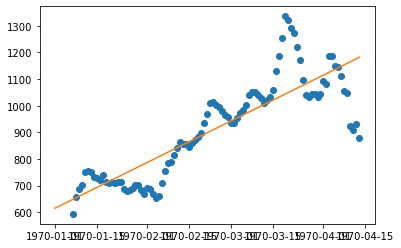

In [31]:
#6th question
import numpy as np
import matplotlib.pyplot as plt

day_number_list=np.array(timestamps).astype(int)//(24*60*60)
days, day_event_counts = np.unique(day_number_list, return_counts=True)
fig1 = plt.figure()
plt.plot_date(x=days, y=day_event_counts)
plt.show()
fig2 = plt.figure()
a, b = np.polyfit(days[6:], np.convolve(day_event_counts, np.ones(N)/N, mode='valid'), 1)
N=7
plt.plot_date(x=days[6:], y=np.convolve(day_event_counts, np.ones(N)/N, mode='valid'))
plt.plot(days, a*days+b)
plt.show()
